In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split,GridSearchCV

In [2]:
#reading the zoo dataset
df=pd.read_csv('Zoo.csv')
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [3]:
#top d data
df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [4]:
#missimg values
df.isnull().sum()
#There is no null values in the data

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [5]:
#no duplicated values in the data
df[df.duplicated()]

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [7]:
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [8]:
df=df.drop('animal name',axis=1)
df

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [9]:
features=df.drop('type',axis=1)
features

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [10]:
target=df[['type']]
target

,type
0,1
1,1
2,4
3,1
4,1
...,...
96,1
97,6
98,1
99,7


In [11]:
df1=df.corr()
df1

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
hair,1.000000,-0.427851,-0.817382,0.878503,-0.198431,-0.473554,-0.154769,0.492531,0.191681,0.441149,-0.104245,-0.280313,0.394009,0.048973,0.207208,0.455020,-0.562384
feathers,-0.427851,1.000000,0.419248,-0.410761,0.656553,-0.058552,-0.104430,-0.613631,0.231403,0.254588,-0.145739,-0.223541,-0.206686,0.292569,0.031586,-0.135934,-0.197520
eggs,-0.817382,0.419248,1.000000,-0.938848,0.376646,0.376244,0.011605,-0.642150,-0.340420,-0.382777,0.098689,0.164796,-0.224918,-0.221090,-0.155610,-0.514650,0.661825
milk,0.878503,-0.410761,-0.938848,1.000000,-0.366765,-0.362613,-0.029721,0.628168,0.384958,0.423527,-0.242449,-0.156328,0.214196,0.210026,0.163928,0.574906,-0.723683
airborne,-0.198431,0.656553,0.376646,-0.366765,1.000000,-0.172638,-0.295181,-0.594311,-0.104718,0.286039,0.008528,-0.251157,0.043712,0.009482,0.063274,-0.349768,0.022677
aquatic,-0.473554,-0.058552,0.376244,-0.362613,-0.172638,1.000000,0.375978,0.053150,0.022463,-0.637506,0.087915,0.604492,-0.360638,-0.034642,-0.224308,-0.111866,0.326639
predator,-0.154769,-0.104430,0.011605,-0.029721,-0.295181,0.375978,1.000000,0.129452,0.051022,-0.262931,0.115391,0.190302,-0.099723,0.018947,-0.309794,0.144790,0.061179
toothed,0.492531,-0.613631,-0.642150,0.628168,-0.594311,0.053150,0.129452,1.000000,0.575085,-0.065690,-0.062344,0.364292,-0.193476,0.310368,0.069430,0.344010,-0.471527
backbone,0.191681,0.231403,-0.340420,0.384958,-0.104718,0.022463,0.051022,0.575085,1.000000,0.207666,-0.246611,0.209499,-0.432856,0.731762,0.101733,0.356976,-0.828845
breathes,0.441149,0.254588,-0.382777,0.423527,0.286039,-0.637506,-0.262931,-0.065690,0.207666,1.000000,-0.120752,-0.617219,0.369868,0.088952,0.124068,0.204125,-0.519308


<Axes: >

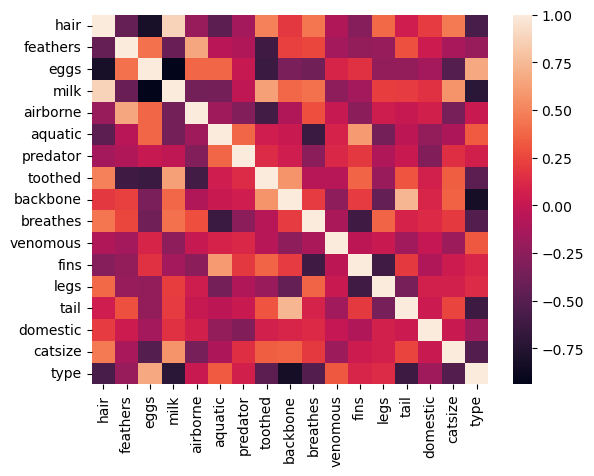

In [12]:
#visualizations
sns.heatmap(df1)

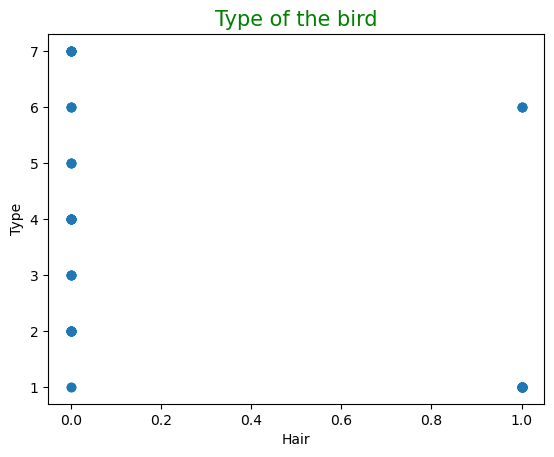

In [13]:
plt.scatter(x=df['hair'],y=df['type'])
plt.title('Type of the bird',color="green",size=15)
plt.xlabel('Hair')
plt.ylabel('Type')
plt.show()

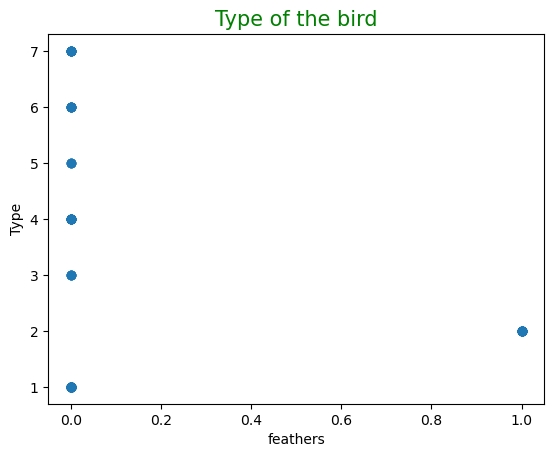

In [14]:
plt.scatter(x=df['feathers'],y=df['type'])
plt.title('Type of the bird',color="green",size=15)
plt.xlabel('feathers')
plt.ylabel('Type')
plt.show()

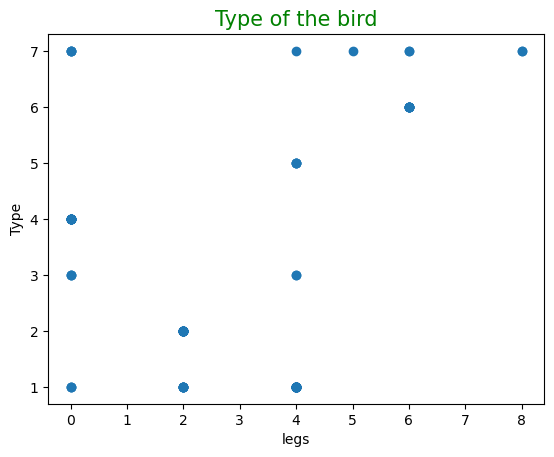

In [15]:
plt.scatter(x=df['legs'],y=df['type'])
plt.title('Type of the bird',color="green",size=15)
plt.xlabel('legs')
plt.ylabel('Type')
plt.show()

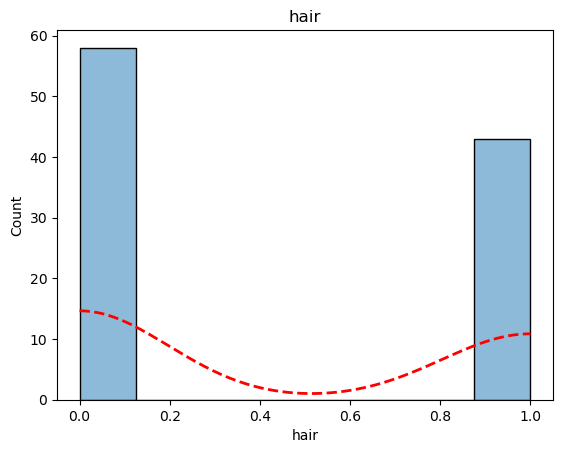

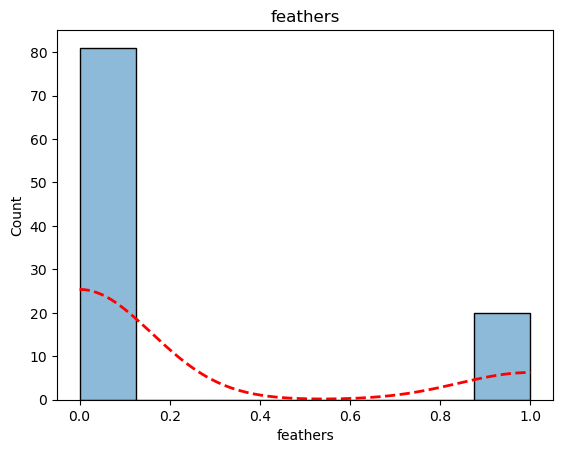

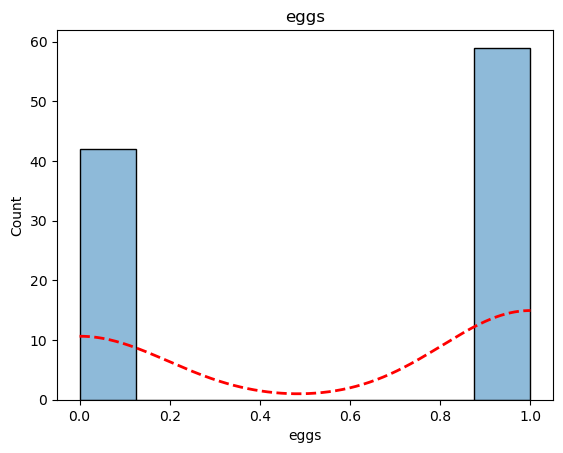

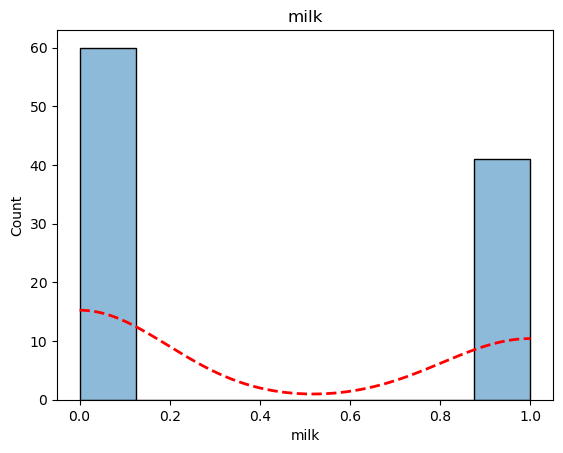

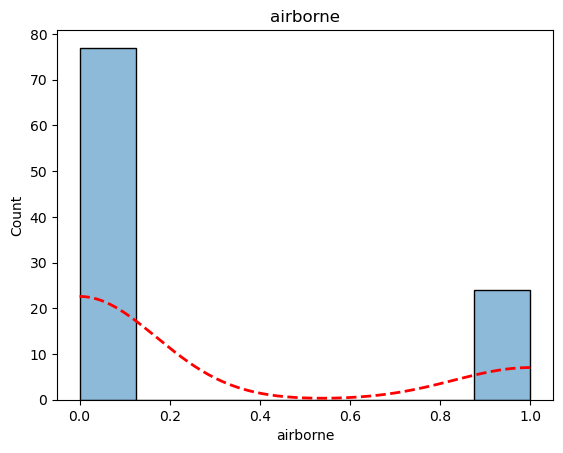

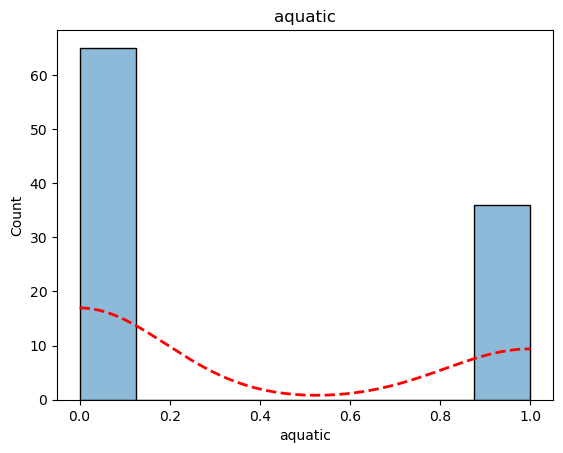

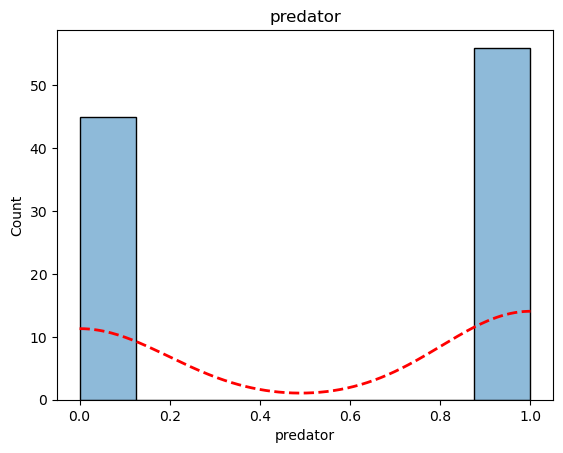

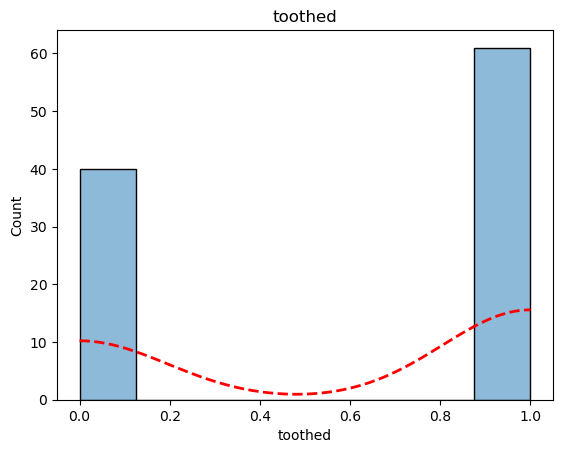

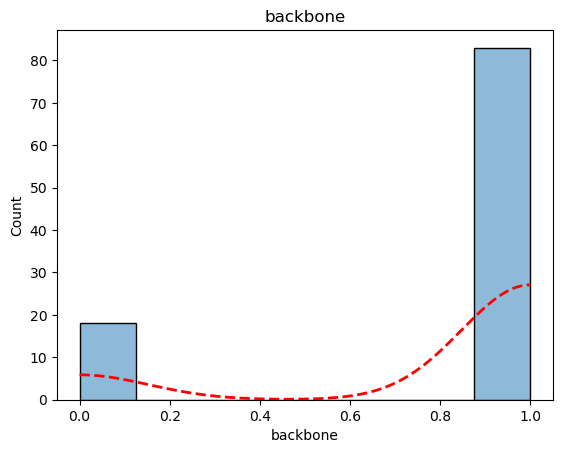

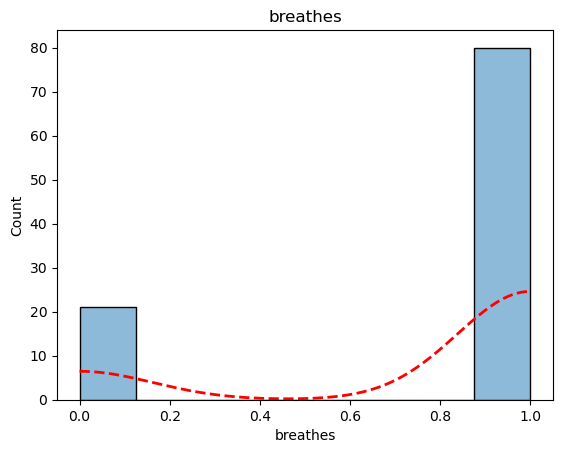

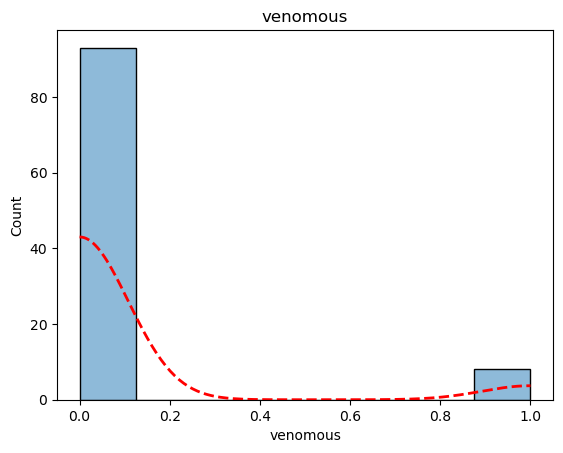

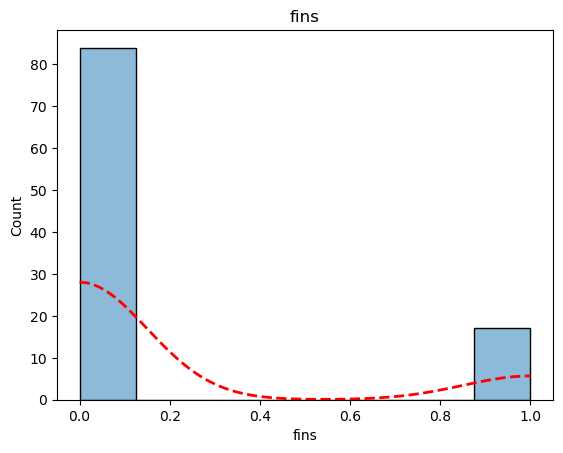

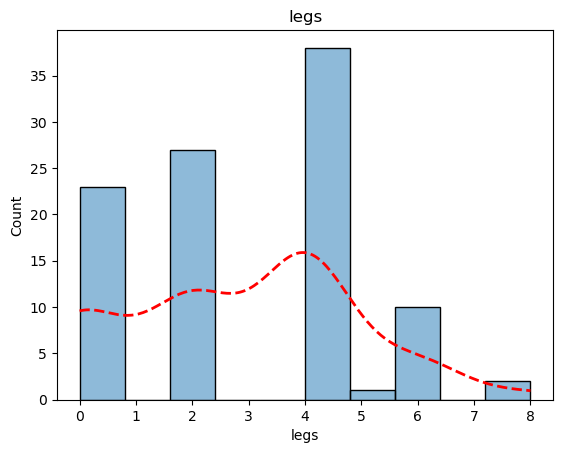

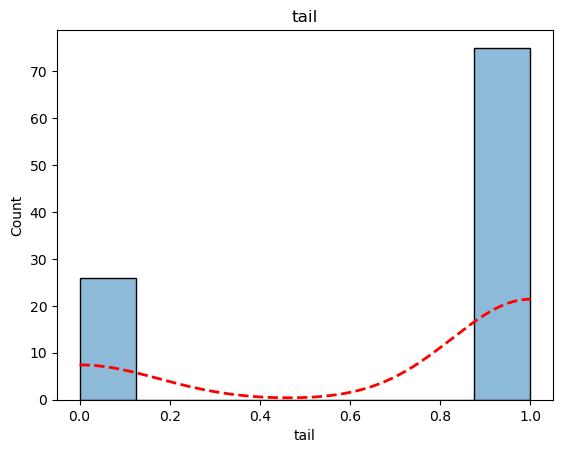

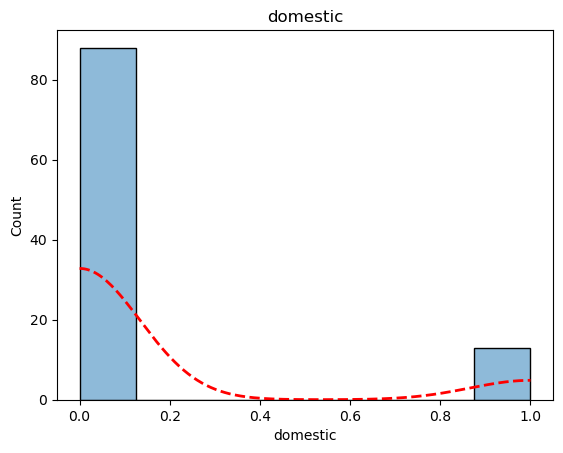

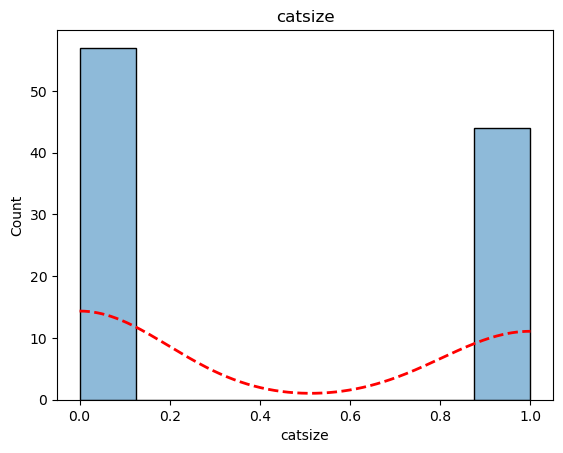

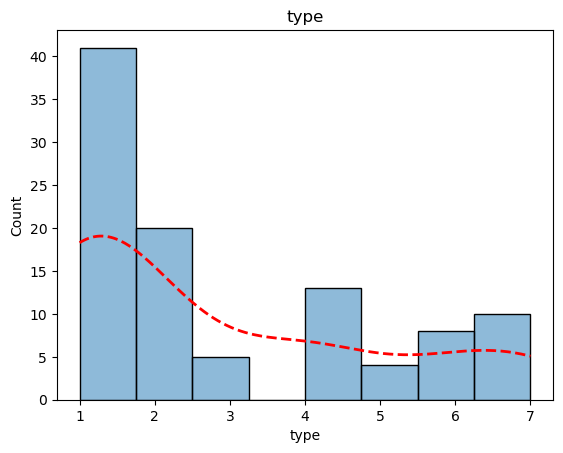

In [16]:
for i in df:
    sns.histplot(df[i], kde = True,
                line_kws = {'linestyle':'dashed',
                         'linewidth':'2'}).lines[0].set_color('red')
    plt.title(i)
    plt.show()


C:\Users\Navya Sri Palakuru\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


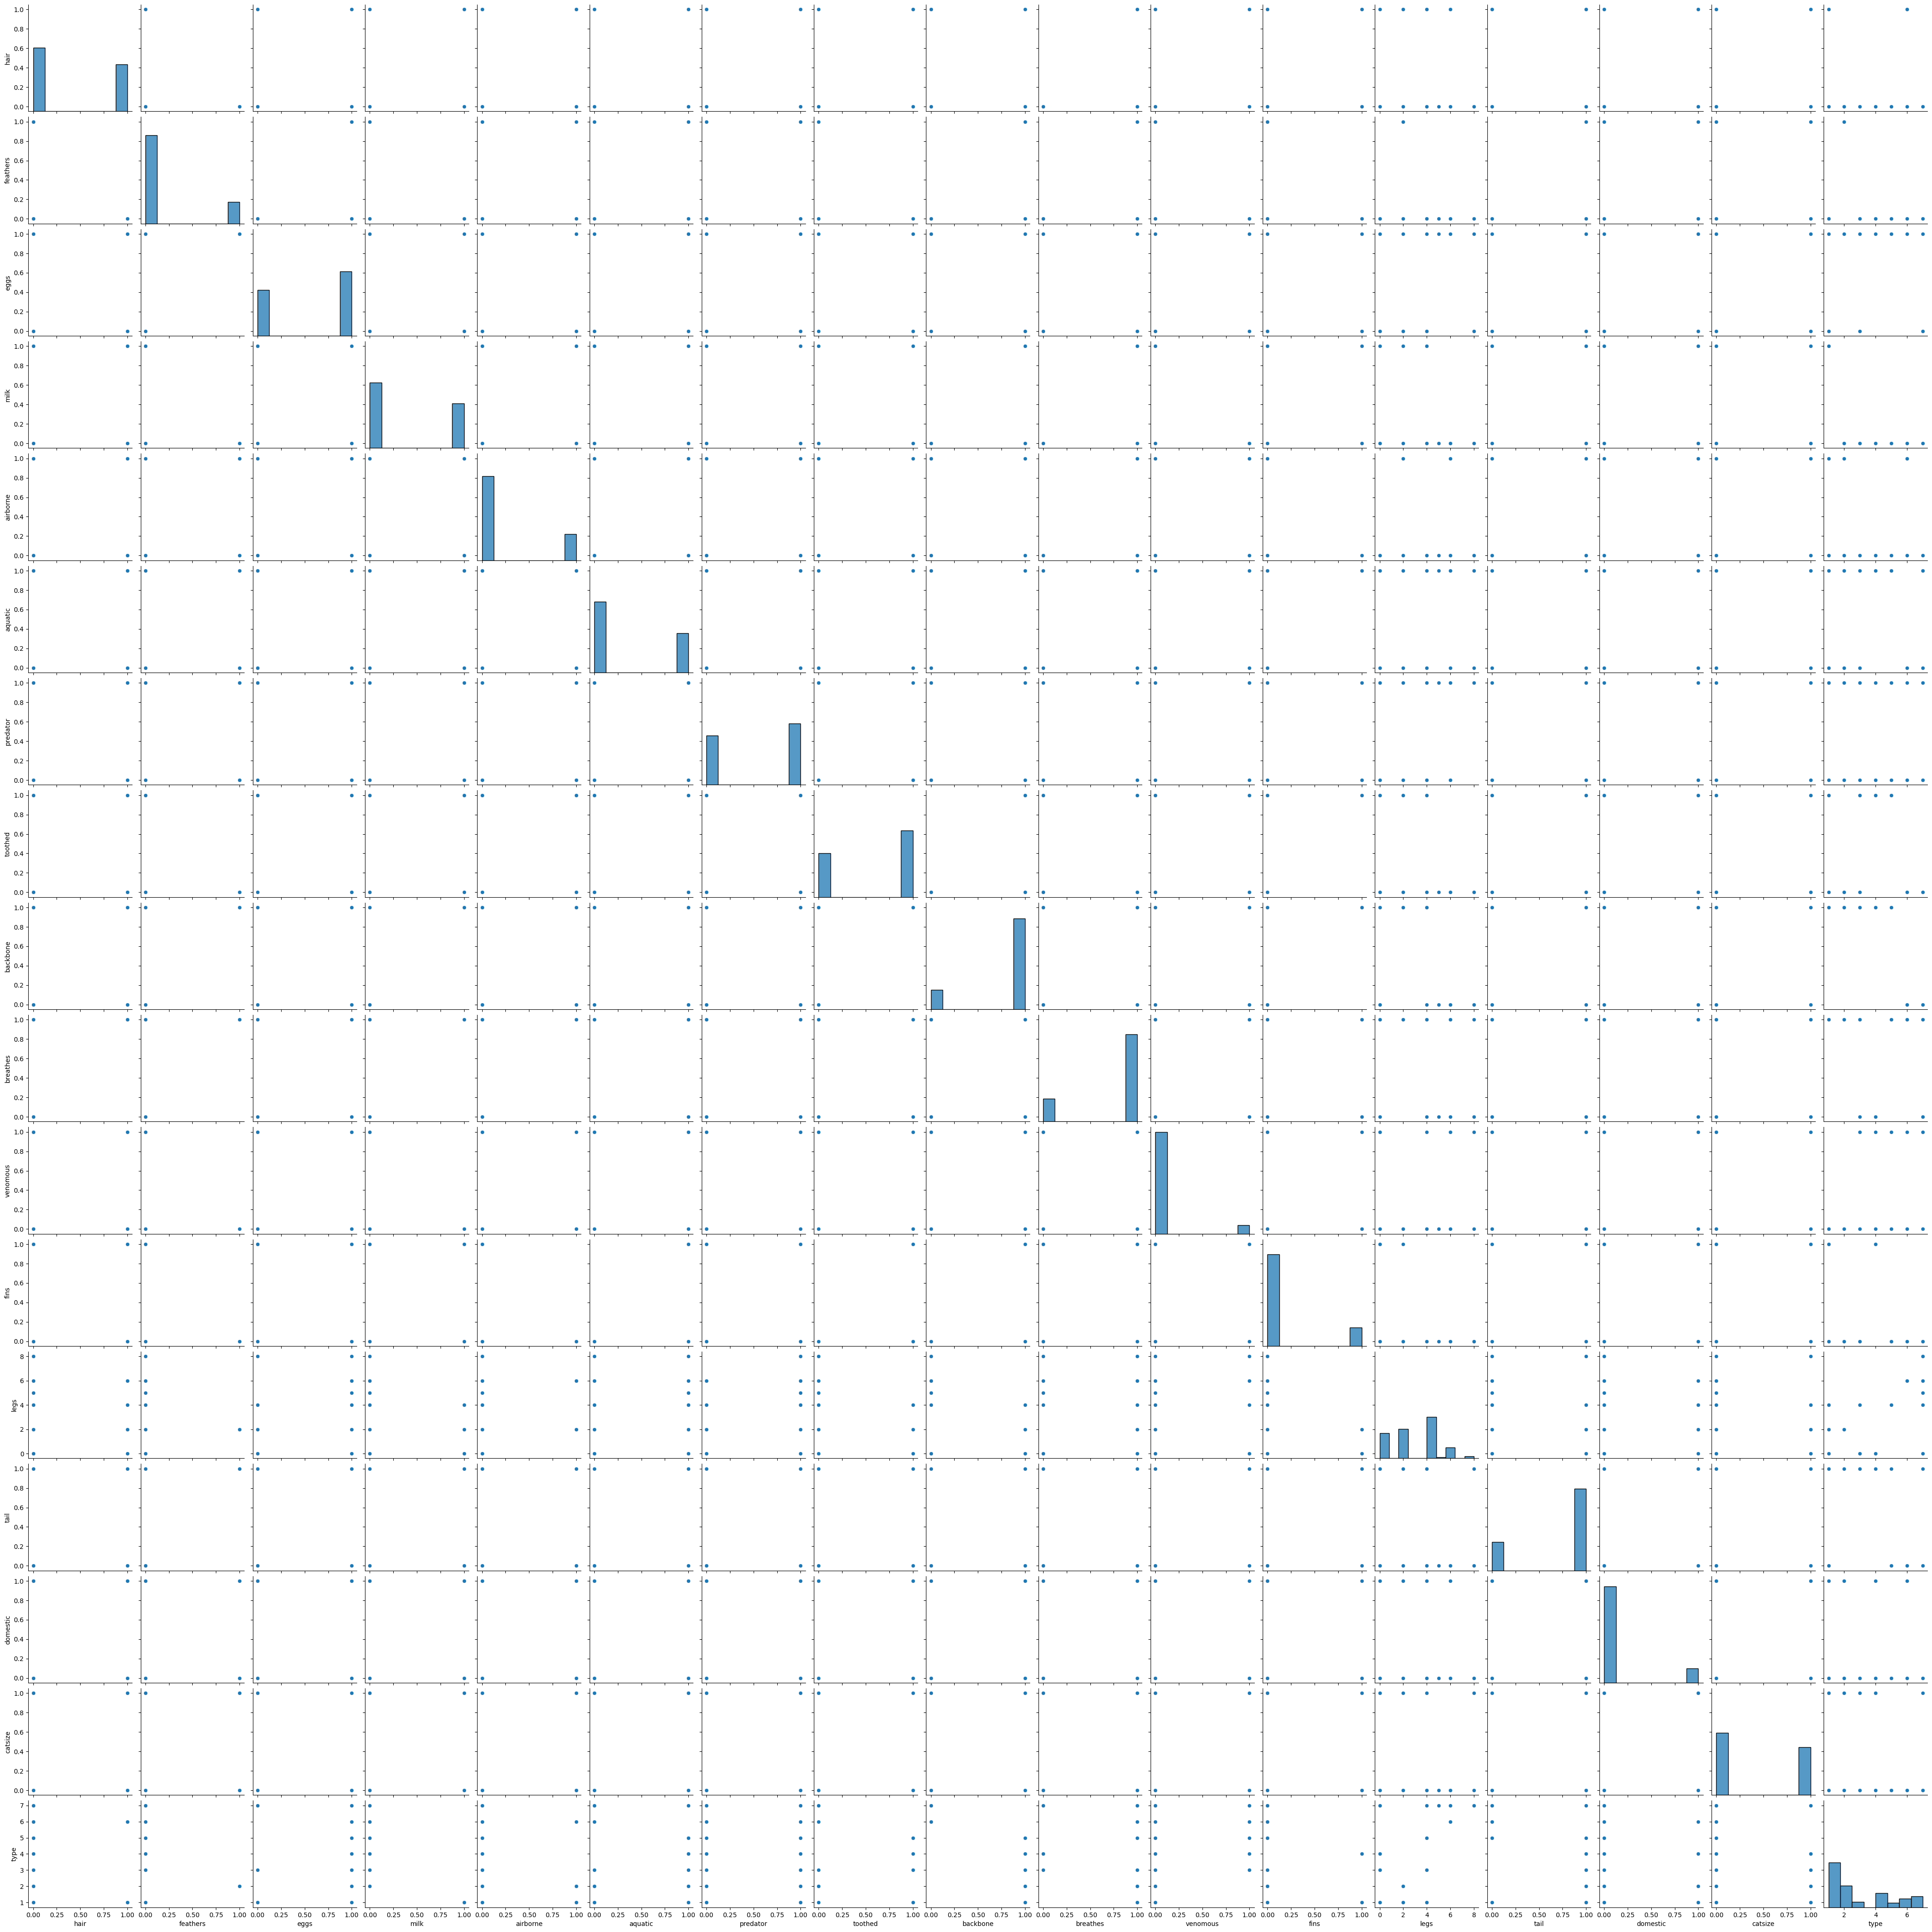

In [17]:
sns.pairplot(df)

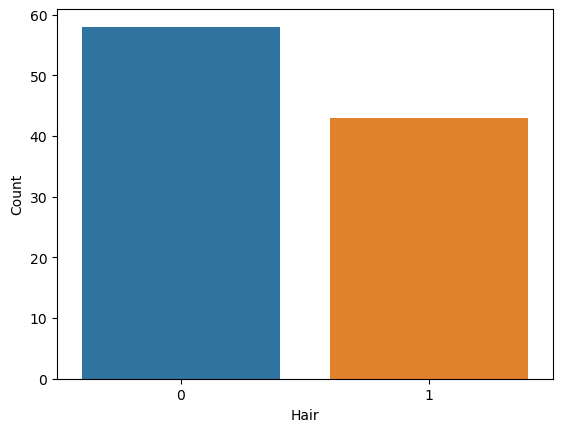

0    58
1    43
Name: hair, dtype: int64

In [58]:
#visualizing has hair or not
sns.countplot(x='hair',data=df)
plt.xlabel("Hair")
plt.ylabel("Count")
plt.show()
df.loc[:,'hair'].value_counts()

<Axes: >

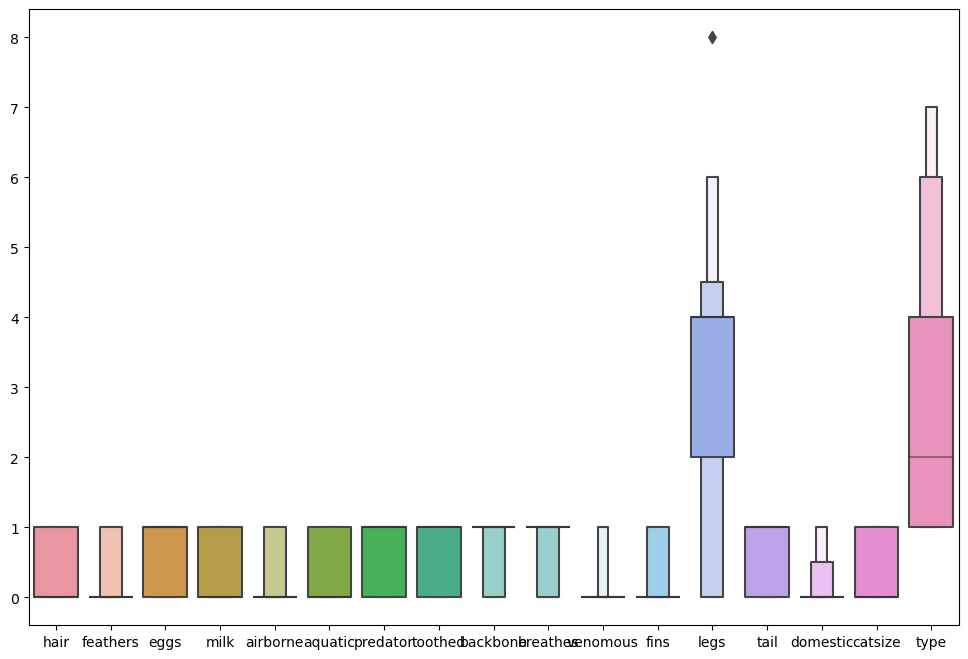

In [18]:
#outliers checking
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,8))
sns.boxenplot(df )

In [19]:
Q1=df['legs'].quantile(0.25)
Q1

2.0

In [20]:
Q3=df['legs'].quantile(0.75)
Q3

4.0

In [21]:
IQR=Q3-Q1
IQR

2.0

In [22]:
upper_extreme=Q3+1.5*IQR
upper_extreme

7.0

In [23]:
lower_extreme=Q1-1.5*IQR
lower_extreme

-1.0

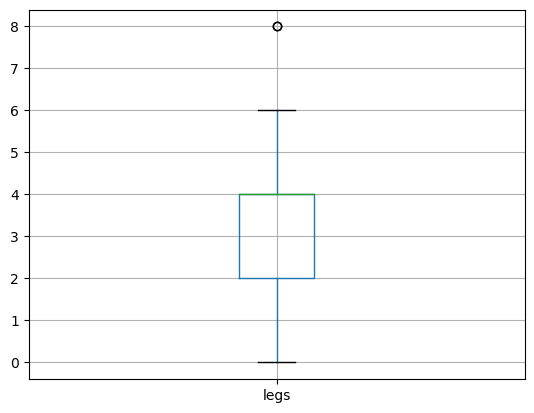

In [24]:
df.boxplot('legs')
plt.show()

In [25]:
df_outliers=df[(df.legs<lower_extreme)|(df.legs>upper_extreme)]
df_outliers

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
53,0,0,1,0,0,1,1,0,0,0,0,0,8,0,0,1,7
72,0,0,0,0,0,0,1,0,0,1,1,0,8,1,0,0,7


In [26]:
df_no_outliers=df[(df.legs>lower_extreme)|(df.legs<upper_extreme)]
df_no_outliers


,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [27]:
#splitting the dataset into 80% training and 20% testing
x_train,x_test,y_train,y_test=train_test_split(features,target,train_size=0.80,random_state=100)

In [28]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(80, 16)
(21, 16)
(80, 1)
(21, 1)


In [29]:
knn=KNeighborsClassifier(n_neighbors=3)

In [30]:
knn.fit(x_train,y_train)

C:\Users\Navya Sri Palakuru\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

In [31]:
x_train

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
84,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,0
83,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,0
43,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,0
28,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
22,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,0,1,1,0,1,1,1,0,1,1,0,0,2,1,0,0
87,0,1,1,0,1,1,0,0,1,1,0,0,2,1,0,1
67,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
24,0,0,1,0,0,0,0,0,0,1,0,0,6,0,0,0


In [32]:
x_test

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
37,0,1,1,0,1,0,1,0,1,1,0,0,2,1,0,0
86,0,0,1,0,0,1,1,1,1,0,1,1,0,1,0,1
26,0,0,1,0,0,1,1,1,1,1,1,0,4,0,0,0
93,1,0,0,1,1,0,0,1,1,1,0,0,2,1,0,0
35,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,0
25,0,0,1,0,0,1,1,1,1,1,0,0,4,0,0,0
36,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,0
33,0,1,1,0,1,1,1,0,1,1,0,0,2,1,0,0
78,0,1,1,0,1,1,1,0,1,1,0,0,2,1,0,0
21,0,1,1,0,1,1,0,0,1,1,0,0,2,1,0,0


In [38]:
!pip uninstall scikit-learn
!pip install scikit-learn==1.3.0

^C
^C


In [39]:
y_pred=knn.predict(x_test.values)

C:\Users\Navya Sri Palakuru\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  break


In [40]:
accuracy_score(y_test,y_pred)

0.9523809523809523

In [42]:
confusion_matrix(y_test,y_pred)

array([[8, 0, 0, 0, 0, 0],
       [0, 6, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 2, 0, 0],
       [0, 0, 0, 0, 2, 0],
       [0, 0, 0, 0, 0, 2]], dtype=int64)

In [54]:
import warnings
warnings.filterwarnings('ignore')
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         6
           3       0.00      0.00      0.00         1
           4       1.00      1.00      1.00         2
           5       0.67      1.00      0.80         2
           6       1.00      1.00      1.00         2

    accuracy                           0.95        21
   macro avg       0.78      0.83      0.80        21
weighted avg       0.92      0.95      0.93        21



In [44]:
params={'n_neighbors':[1,2,3,4,5,6,7,8,9,10]}

In [45]:
grid_search=GridSearchCV(knn,params)

In [53]:
import warnings
warnings.filterwarnings('ignore')
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=3),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [47]:
grid_search.best_params_

{'n_neighbors': 1}

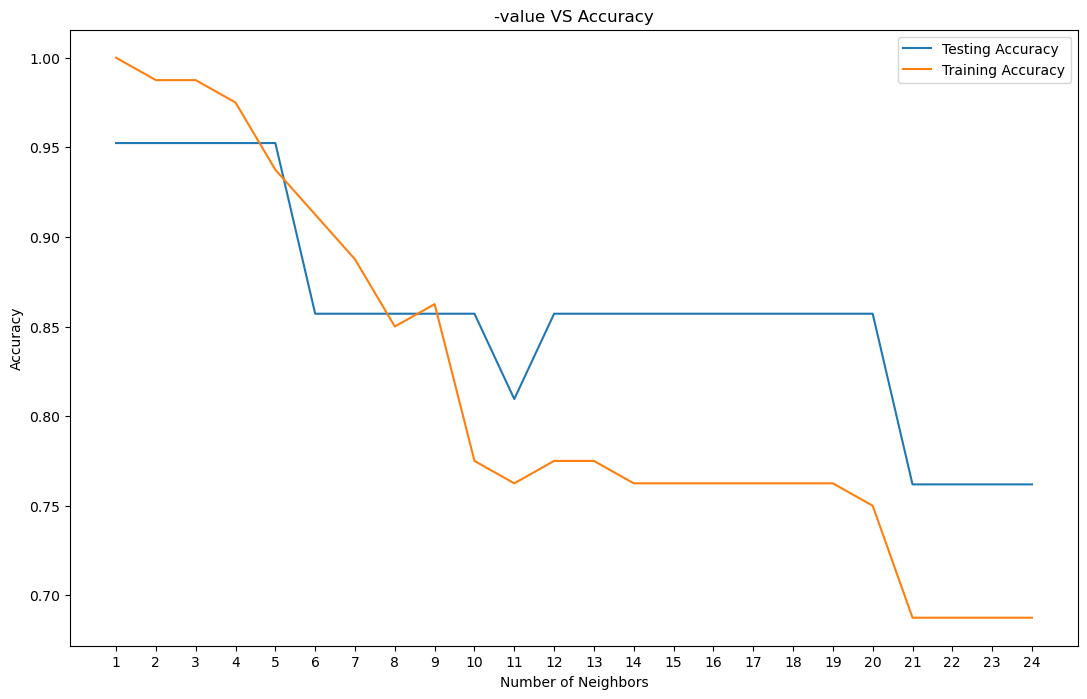

Best accuracy is 0.9523809523809523 with K = 1


In [52]:
import warnings
warnings.filterwarnings('ignore')
k_values = np.arange(1,25)
train_accuracy = []
test_accuracy = []

for i, k in enumerate(k_values):
    # k from 1 to 25(exclude)
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit with knn
    knn.fit(x_train.values,y_train.values)
    #train accuracy
    train_accuracy.append(knn.score(x_train.values, y_train.values))
    # test accuracy
    test_accuracy.append(knn.score(x_test.values, y_test.values))

    # Plot
plt.figure(figsize=[13,8])
plt.plot(k_values, test_accuracy, label = 'Testing Accuracy')
plt.plot(k_values, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('-value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.savefig('graph.png')
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

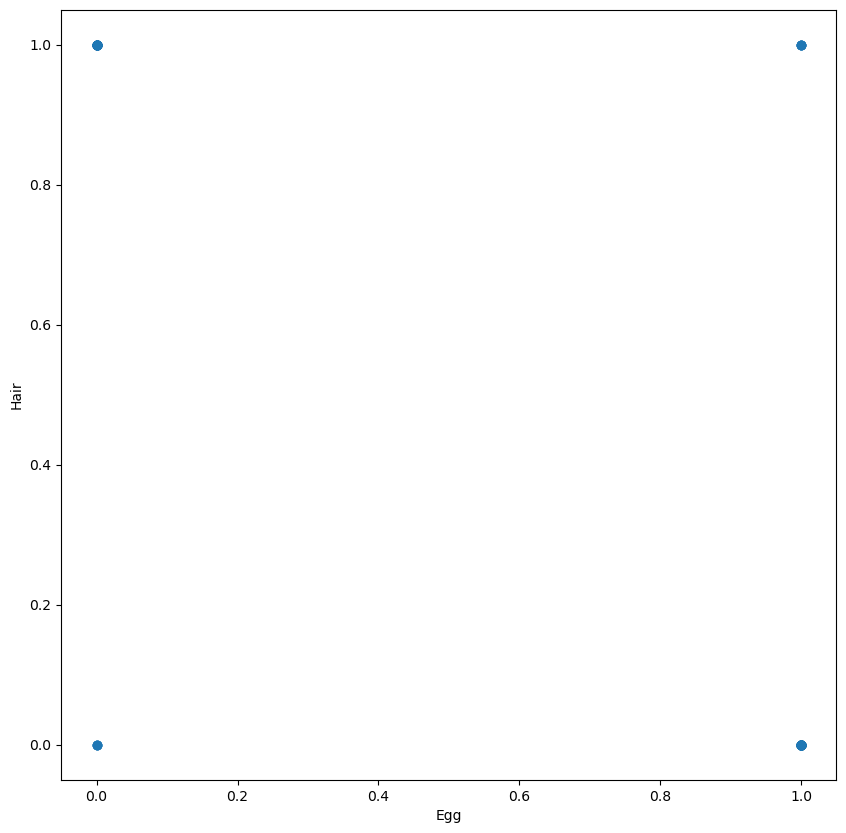

In [60]:
#visualizing eggs ans hair on scatter
x = np.array(df.loc[:,"eggs"]).reshape(-1,1)
y = np.array(df.loc[:,'hair']).reshape(-1,1)

plt.figure(figsize=[10,10])
plt.scatter(x=x,y=y)
plt.xlabel('Egg')
plt.ylabel('Hair')
plt.show()